In [20]:
import numpy as np
from matplotlib import pyplot as plt
import math
from matplotlib import cm as cmx
from matplotlib import colors
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [21]:
cm = plt.get_cmap() 
cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

In [22]:
class SimpleRNG:
    def __init__(self,m,a,c,x0):
        self.m = m
        self.a = a
        self.c = c
        self.x0 = x0
    
    def draw(self):
        self.x0 = (self.a*self.x0 +self.c) % self.m
        return self.x0


In [23]:
def rngseq(rng,N):
    seq = []
    for i in range(N):
        seq.append(rng.draw())
    return seq

In [24]:
def check_periodicity(seq):
    try:
        return seq[1:].index(seq[0])+1
    except ValueError:
        return -1

In [25]:
def plot_sequence_2D(seq):
    x = seq[::2]
    y = seq[1::2]
    size = min(len(x),len(y))
    x = x[:size]
    y = y[:size]
    colors = [scalarMap.to_rgba(float(i)/size) for i in range(size)]
    plt.scatter(x,y,s=5,color=colors)
    plt.show()

256


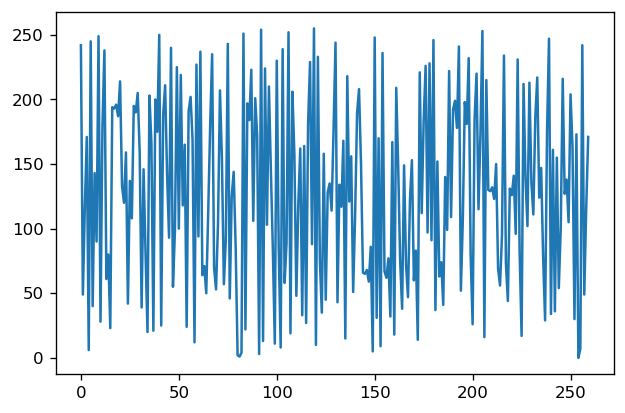

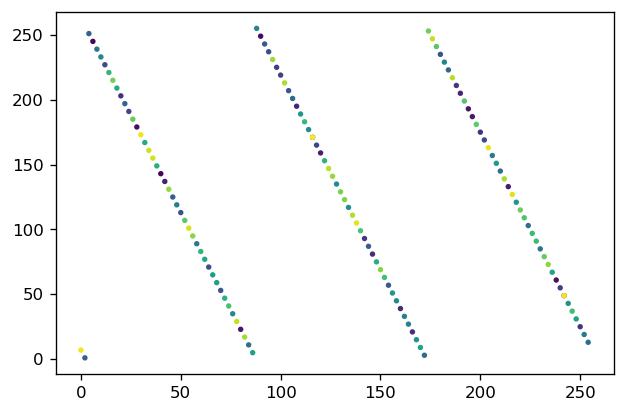

In [26]:
rng1 = SimpleRNG(256,253,7,7)
seq = rngseq(rng1,260)
plt.plot(seq)
print(check_periodicity(seq))
plt.show()
plot_sequence_2D(seq)

512


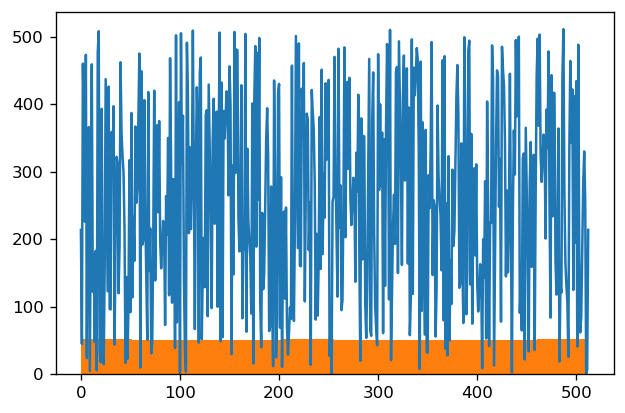

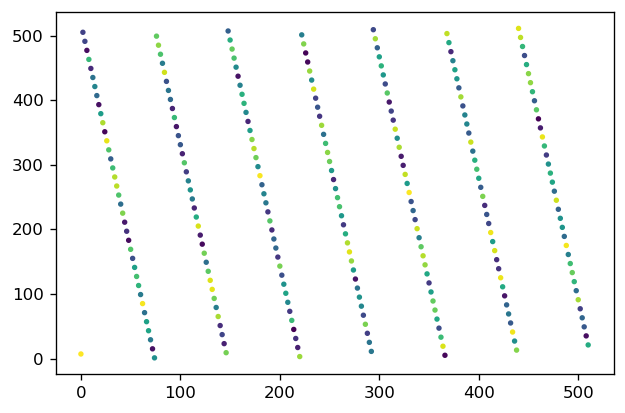

In [27]:
rng2 = SimpleRNG(512,249,7,7)
seq = rngseq(rng2,513)
plt.plot(seq)
print(check_periodicity(seq))
plt.hist(seq)
plt.show()
plot_sequence_2D(seq)

In [28]:
def rngseq2(rng1,rng2,N):
    seq = []
    for i in range(N):
        val1 = rng1.draw()
        val2 = rng2.draw()
        while not (val2%2==0 or val2%3==0 or val2%5==0 or val2%2==7 or val2%13==0):
            val1 = rng1.draw()
            val2 = rng2.draw()
        seq.append(val1)
    return seq   

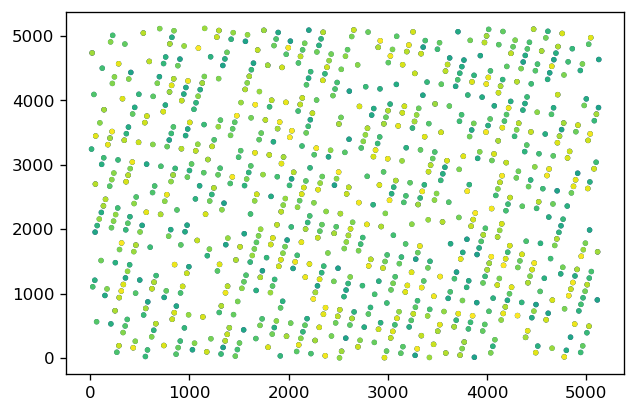

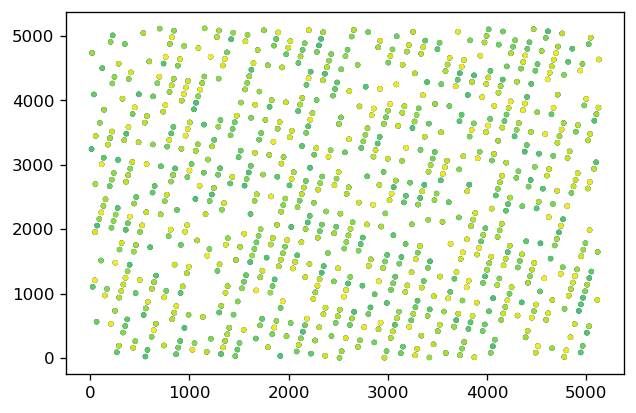

1078


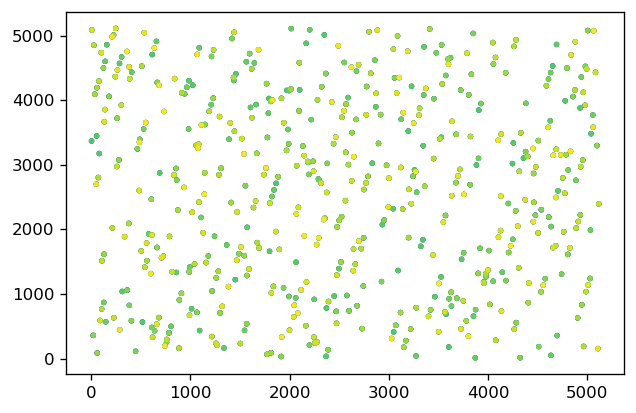

In [29]:
#rng1 = SimpleRNG(7777,23,199,1206)
rng1 = SimpleRNG(5127,249,7,7)
seq1 = rngseq(rng1,4000)
plot_sequence_2D(seq1)

rng2 = SimpleRNG(5127,249,7,7)
seq2 = rngseq(rng2,6000)
plot_sequence_2D(seq2)

seq = rngseq2(rng2,rng1,4000)
print(check_periodicity(seq))
plot_sequence_2D(seq)

In [30]:
def max_planes(k,m):
    return np.power(math.factorial(k)*m,1/k)

In [31]:
def integrate(func,borders,N,algorithm = 'trapezoidal'):
    h = (borders[1]-borders[0])/(N-1)
    x = np.linspace(borders[0],borders[1],N)
    if algorithm == 'trapezoidal':
        weights = np.ones_like(x)
        weights[[0,-1]]=0.5
        #print(weights)
    if algorithm == 'simpson':
        if N % 2 == 0:
            N+=1
        weights = np.zeros_like(x)
        weights[1::2] = 4.0/3
        weights[2::2] = 2.0/3
        weights[[0,-1]] = 1.0/3
    #print(weights)
    #print(h)
    result = np.sum(func(x)*weights*h)
    return result

In [32]:
integrate(np.cos,(-0.5*np.pi,0.5*np.pi),1310000,'trapezoidal')

1.9999999999990412

In [33]:
def eq4(x):
    x = x.copy()
    wherezero = np.where(x==0)
    x[wherezero] = -1.0
    res = np.log(np.cos(x))/x
    res[wherezero] = 0.0
    #print(wherezero)
    return res

def eq3(x):
    return np.sin(x)

def eq2(x):
    return np.exp(-x)

1.000049240239749

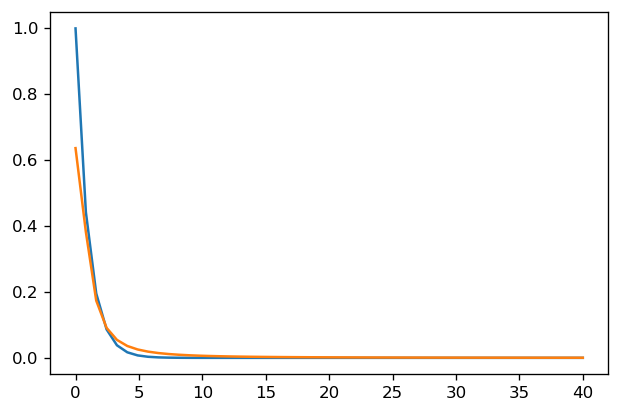

In [34]:
x = np.linspace(0,40)
y = eq2(x)
plt.plot(x,y)
plt.plot(x,2/(np.pi*(1.0+x**2)))
integrate(eq2,(0,40.0),131,'simpson')

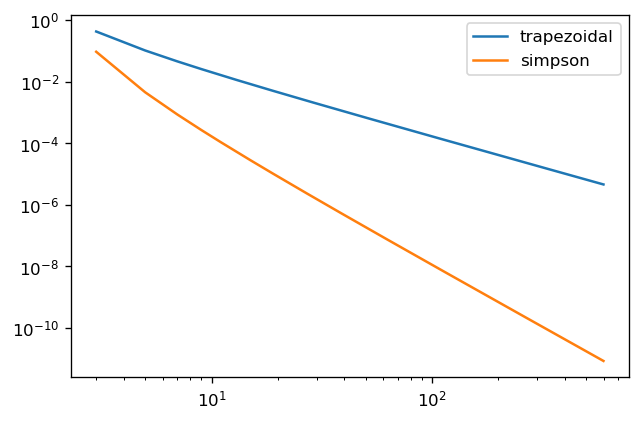

In [35]:
res_t = []
res_s = []
n = []

func = eq3
borders = (0,np.pi)

for N in range(1,300):
    res_t.append(integrate(eq3,borders,2*N+1,'trapezoidal'))
    res_s.append(integrate(eq3,borders,2*N+1,'simpson'))
    n.append(2*N+1)

converged = -0.27568727380043716
converged = 2
terr = np.abs((np.asarray(res_t)-converged))#/np.asarray(res_t)
serr = np.abs(np.asarray(res_s)-converged)#/np.asarray(res_s)
plt.plot(n,terr,label='trapezoidal')
plt.plot(n,serr,label='simpson')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [36]:
import random
def random_uniform(N=1.e16):
    return float(random.randint(0,N))/N

In [37]:
def integrate_mc_rejection(func,a,b,N,fmin,fmax):
    randx = a + np.random.rand((N))*(b-a)
    randy = np.random.rand((N))*(fmax-fmin)
    feval = func(randx)
    res = np.sum(randy<feval-fmin)*((b-a)*(fmax-fmin))/N + (b-a)*fmin
    return res

integrate_mc_rejection(np.sin,0,np.pi,int(1.e8),-1,1)
    

2.0000859151211

In [38]:
def integrate_mc_mean(func,a,b,N):
    randx = a + np.random.rand((N))*(b-a)
    res = np.sum(func(randx))*(b-a)/N
    return res

integrate_mc_mean(np.sin,0,np.pi,int(1.e8))

2.0000297407475554

In [39]:
def integrate_mc_importance(func,weightfunc,transformfunc,N):
    randx = np.random.rand((N))
    randr = transformfunc(randx)
    res = np.sum(func(randr)/weightfunc(randr))/N
    return res

In [40]:
def eq(x):
    return np.sin(x)

a = 0
b = np.pi

def wfunc(x):
    return 1.0/(b-a)

def tfunc(w):
    return a + (b-a)*w

#print(wfunc((b-a)/2))

#0.479425538604203 1.0 0.5 20
#1.0 1.0 1.5707963267948966 5
#0.3183098861837907 1.5707963267948966
integrate_mc_importance(eq,wfunc,tfunc,100000)

2.003208218993301

In [41]:
print(a,b)

0 3.141592653589793


In [42]:
N = 1000000

class EQContainer:
    def __init__(self,eq,a,b,fmin,fmax,wfunc,tfunc,exact):
        self.eq = eq
        self.a = a
        self.b = b
        self.fmin = fmin
        self.fmax = fmax
        self.wfunc = wfunc
        self.tfunc = tfunc
        self.exact = exact
        #print(self.a,self.b,self.fmin,self.fmax,self.exact,self.wfunc((self.b-self.a)/2),self.tfunc(0.5))
    def integrate(self,method,N):
        if method == "MC_importance":
            testx = (self.b-self.a)/2
            textx = (np.asarray(testx))
            #print(self.eq(testx),self.wfunc(testx),self.tfunc(testx),N)
            res = integrate_mc_importance(self.eq,self.wfunc,self.tfunc,N)
            #print(res)
            return res
        elif method == "MC_mean":
            return integrate_mc_mean(self.eq,self.a,self.b,N)
        elif method == "MC_rejection":
            return integrate_mc_rejection(self.eq,self.a,self.b,N,self.fmin,self.fmax)
        elif method == "trapezoidal":
            return integrate(self.eq,(self.a,self.b),N,'trapezoidal')
        elif method == "simpson":
            return integrate(self.eq,(self.a,self.b),N,'simpson')
        raise Exception(f"{method} is not a valid method!")
    
    def convergence(self,start,factor,num):
        errors = {"MC_importance": [],"MC_mean": [], "MC_rejection": [], "trapezoidal": [], "simpson": []}
        for method in errors.keys():
            for i in range(num):
                N = start * factor**i+1
                res = self.integrate(method,N)
                err = abs(res-self.exact)
                errors[method].append(err)
        n = [start * factor**i+1 for i in range(num)]
        return n,errors

eqs = {}


def eq2(x):
    return np.exp(-x)
a2 = 0
b2 = 50
fmin = 0
fmax = 1
exact = 1.0
def eq2weight(x):
    return 2.0/(np.pi*(1+x**2))
    #return 1.0/((1+x**2)*(np.arctan(b)-np.arctan(a)))
def eq2transf(w):
    return np.tan(np.pi*w/2)
    #return np.tan(np.arctan(a)+w*(np.arctan(b)-np.arctan(a)))
eqs['eq2'] = EQContainer(eq2,a2,b2,fmin,fmax,eq2weight,eq2transf,exact)


def eq3(x):
    return np.sin(x)
a3 = 0
b3 = np.pi
fmin = -1
fmax = 1
exact = 2.0
def eq3weight(x):
    return 1.0/(b3-a3)
def eq3transf(w):
    return a3 + (b3-a3)*w
eqs['eq3'] = EQContainer(eq3,a3,b3,fmin,fmax,eq3weight,eq3transf,exact)


fmin = -1.0
fmax = 0.0
def eq4(x):
    x = x.copy()
    wherezero = np.where(x==0)
    x[wherezero] = -1.0
    res = np.log(np.cos(x))/x
    res[wherezero] = 0.0
    #print(wherezero)
    return res
a4= 0
b4= 1
exact = -0.27568727380043716
def eq4weight(x):
    return 1.0/(b4-a4)
def eq4transf(w):
    return a + (b4-a4)*w
eqs['eq4'] = EQContainer(eq4,a4,b4,fmin,fmax,eq4weight,eq4transf,exact)


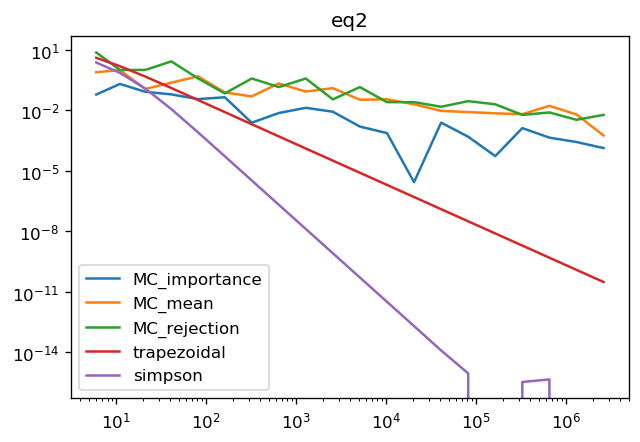

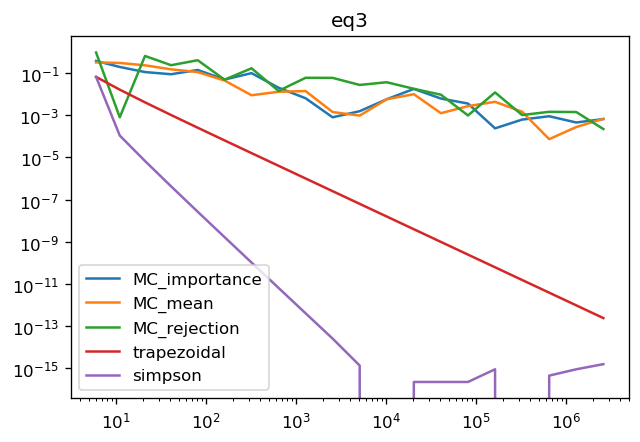

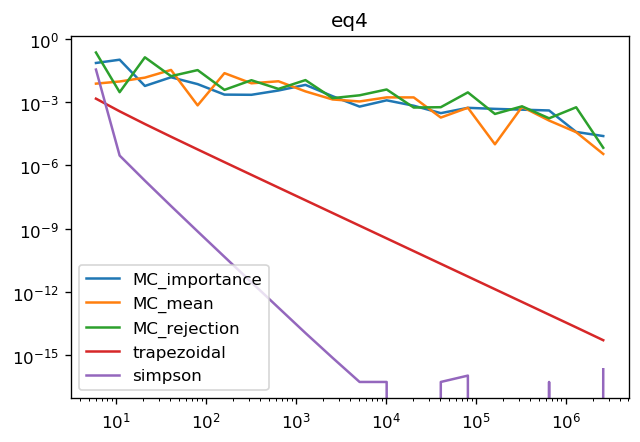

In [19]:
for eqname,eq in eqs.items():
    plt.title(eqname)
    n,errs = eq.convergence(5,2,20)
    for method in errs.keys():
        #if "MC" not in method:
        #    continue
        plt.plot(n,errs[method],label=method)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

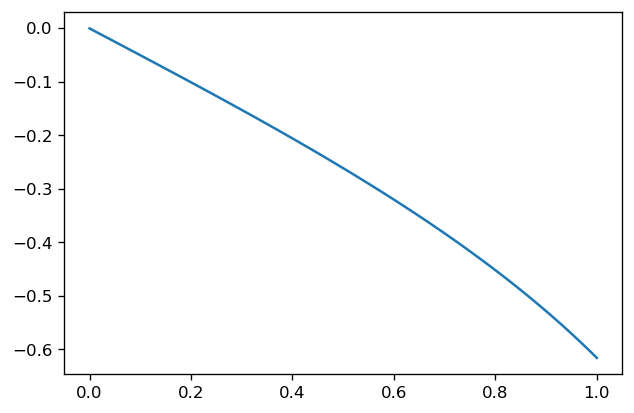

In [194]:
x = np.linspace(0.0,1,100)
plt.plot(x,eq4(x))

In [96]:
eq4(x)

(array([], dtype=int64),)


array([ 0.61562647, -0.00505059, -0.0101017 , -0.01515383, -0.02020752,
       -0.02526327, -0.0303216 , -0.03538303, -0.04044809, -0.04551729,
       -0.05059117, -0.05567025, -0.06075505, -0.06584613, -0.070944  ,
       -0.07604922, -0.08116233, -0.08628388, -0.09141443, -0.09655453,
       -0.10170475, -0.10686566, -0.11203783, -0.11722186, -0.12241833,
       -0.12762784, -0.13285099, -0.1380884 , -0.14334069, -0.14860849,
       -0.15389244, -0.15919319, -0.1645114 , -0.16984774, -0.17520289,
       -0.18057754, -0.18597241, -0.19138821, -0.19682568, -0.20228555,
       -0.20776859, -0.21327558, -0.21880731, -0.22436459, -0.22994824,
       -0.23555911, -0.24119806, -0.24686598, -0.25256377, -0.25829235,
       -0.26405267, -0.26984571, -0.27567246, -0.28153393, -0.28743119,
       -0.29336531, -0.29933738, -0.30534856, -0.3114    , -0.3174929 ,
       -0.32362851, -0.32980809, -0.33603295, -0.34230445, -0.34862398,
       -0.35499296, -0.3614129 , -0.3678853 , -0.37441176, -0.38

In [202]:
np.log(np.exp(1))

1.0

In [63]:
x = np.linspace(0,1)
np.where(x==0)

(array([0]),)